# SWIGGY SALES ANALYSIS

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

#### Import Data

In [3]:
df = pd.read_excel("C:/Users/sanik/Downloads/swiggy_data.xlsx")

In [4]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [5]:
df.tail()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
197425,Sikkim,Gangtok,2025-01-25,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,4.4,0
197426,Sikkim,Gangtok,2025-07-02,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,4.4,0
197427,Sikkim,Gangtok,2025-03-25,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,4.4,0
197428,Sikkim,Gangtok,2025-03-26,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,4.4,0
197429,Sikkim,Gangtok,2025-03-27,Mama's Kitchen,Gangtok,Momos,Soya Momo,100.0,4.4,0


#### Metadata

In [7]:
print("No of Rows:", df.shape[0])

No of Rows: 197430


In [8]:
print("No of Fiels:", df.shape[1])

No of Fiels: 10


In [9]:
df.info

<bound method DataFrame.info of             State       City Order Date           Restaurant Name  \
0       Karnataka  Bengaluru 2025-06-29  Anand Sweets & Savouries   
1       Karnataka  Bengaluru 2025-04-03     Srinidhi Sagar Deluxe   
2       Karnataka  Bengaluru 2025-01-15     Srinidhi Sagar Deluxe   
3       Karnataka  Bengaluru 2025-04-17     Srinidhi Sagar Deluxe   
4       Karnataka  Bengaluru 2025-03-13     Srinidhi Sagar Deluxe   
...           ...        ...        ...                       ...   
197425     Sikkim    Gangtok 2025-01-25            Mama's Kitchen   
197426     Sikkim    Gangtok 2025-07-02            Mama's Kitchen   
197427     Sikkim    Gangtok 2025-03-25            Mama's Kitchen   
197428     Sikkim    Gangtok 2025-03-26            Mama's Kitchen   
197429     Sikkim    Gangtok 2025-03-27            Mama's Kitchen   

                    Location     Category  \
0       Rajarajeshwari Nagar        Snack   
1                    Kengeri  Recommended   
2   

#### Data Types

In [10]:
df.dtypes

State                      object
City                       object
Order Date         datetime64[ns]
Restaurant Name            object
Location                   object
Category                   object
Dish Name                  object
Price (INR)               float64
Rating                    float64
Rating Count                int64
dtype: object

In [11]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


### KPI's

#### Total Sales

In [15]:
Total_sales = df["Price (INR)"].sum()
print("Total sales (INR):",round(Total_sales,2))

Total sales (INR): 53012505.77


#### Average Rating

In [17]:
Average_rating = df["Rating"].mean()
print("Average rating:", round(Average_rating,1))

Average rating: 4.3


#### Average Order Value

In [23]:
Avg_order_value= df["Price (INR)"].mean()
print("Avg order value (INR):",round(Avg_order_value,2))

Avg order value (INR): 268.51


#### Ratings Count

In [22]:
Ratings_count = df["Rating Count"].sum()
print("Rating Count:",round(Ratings_count,2))

Rating Count: 5591574


#### Total Orders

In [25]:
total_orders = len(df)
print("Total orders:",round(total_orders,2))

Total orders: 197430


# Charts Design

## Monthly Sales Trend

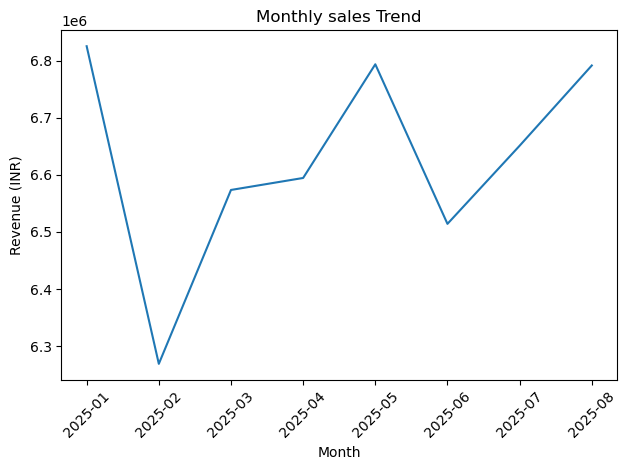

In [30]:
df["Order Date"] = pd.to_datetime(df["Order Date"])    # help to convert into other datatype

df["YearMonth"] = df["Order Date"].dt.to_period("M").astype(str)  # ("M")--->2025-04

monthly_revenue = df.groupby("YearMonth")["Price (INR)"].sum().reset_index()

plt.figure()
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Price (INR)"])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Revenue (INR)")
plt.title("Monthly sales Trend")
plt.tight_layout()
plt.show()

## Daily Sales Trend

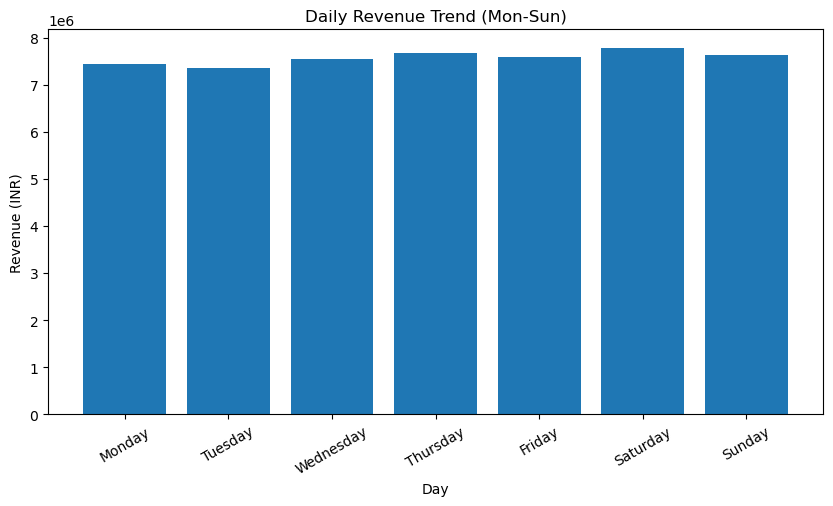

In [34]:
df["DayName"] = pd.to_datetime(df["Order Date"]).dt.day_name()

daily_revenue = (
    df.groupby("DayName")["Price (INR)"]
    .sum()
    .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)

plt.figure(figsize=(10,5))
plt.bar(daily_revenue.index, daily_revenue.values)
plt.title("Daily Revenue Trend (Mon-Sun)")
plt.xlabel("Day")
plt.ylabel("Revenue (INR)")
plt.xticks(rotation=30)
 
plt.show()

## Total Sales by Food Type (Veg vs Non-Veg)

In [58]:
non_veg_keywords = [
    "chicken", "egg", "fish", "mutton",
    "prawn", "biryani", "kabab", "kebob"
]

df["Food Category"] = np.where(
    df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords), na=False),
    "Non-veg",
    "Veg"
)

In [59]:
food_revenue = (
    df.groupby("Food Category")["Price (INR)"]
    .sum()
    .reset_index()
)

In [60]:
import plotly.express as px

fig = px.pie(
    food_revenue,
    values="Price (INR)",
    names="Food Category",
    hole=0.5,
    title="Revenue Contribution: Veg vs Non-veg"
)

fig.update_traces(textinfo="percent+label")

fig.show()

## Total Sales by State

In [49]:
fig = px.bar (
    df.groupby("State", as_index=False)["Price (INR)"].sum()
      .sort_values("Price (INR)", ascending=False),
    x="Price (INR)",
    y="State",
    orientation="h",
    title="Revenue by state (INR)"
)

fig.update_layout(height=600, yaxis=dict(autorange="reversed"))
fig.show()

## Quarterly Performance Summary

In [54]:
df["Order_Date"] = pd.to_datetime(df["Order Date"])
df["Quarter"] = df["Order_Date"].dt.to_period("Q").astype(str)
quarterly_summary = (
    df.groupby("Quarter", as_index=False)
      .agg(
           Total_sales=("Price (INR)", "sum"),
           Avg_Rating=("Rating","mean"),
           Total_Orders=("Order_Date", "count")
      )
      .sort_values("Quarter")
)


quarterly_summary


,Quarter,Total_sales,Avg_Rating,Total_Orders
0,2025Q1,19667821.77,4.342643,73096
1,2025Q2,19902256.59,4.340011,74163
2,2025Q3,13442427.41,4.342359,50171


## Top 5 cities by sales

In [64]:
top_5_cities = (
    df.groupby("City")["Price (INR)"]
    .sum()
    .nlargest(5)
    .sort_values()
    .reset_index()
)

fig = px.bar(
    top_5_cities,
    x="Price (INR)",
    y="City",
    orientation="h",
    title="Top 5 Cities by Sales (INR)",
    color_discrete_sequence=["sky Blue"]
)

fig.show()